# Building plots from `sourmash compare` output


### Running this notebook.

You can run this notebook interactively via mybinder; click on this button:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/dib-lab/sourmash/latest?filepath=doc%2Fplotting-compare.ipynb)

A rendered version of this notebook is available at [sourmash.readthedocs.io](https://sourmash.readthedocs.io) under "Tutorials and notebooks".

You can also get this notebook from the [doc/ subdirectory of the sourmash github repository](https://github.com/dib-lab/sourmash/tree/latest/doc). See [binder/environment.yaml](https://github.com/dib-lab/sourmash/blob/latest/binder/environment.yml) for installation dependencies.

### What is this?

This is a Jupyter Notebook using Python 3. If you are running this via [binder](https://mybinder.org), you can use Shift-ENTER to run cells, and double click on code cells to edit them.

Contact: C. Titus Brown, ctbrown@ucdavis.edu. Please [file issues on GitHub](https://github.com/dib-lab/sourmash/issues/) if you have any questions or comments!

## Running `sourmash compare` and generating figures in Python


First, we need to generate a similarity matrix with compare. (If you want to generate this programmatically, it's just a `numpy` matrix.)

In [1]:
%pylab inline
# import the `fig` module from sourmash:
from sourmash import fig

Populating the interactive namespace from numpy and matplotlib


The `sourmash.fig` module contains code to load the similarity matrix and associated labels:

In [5]:
matrix, labels = fig.load_matrix_and_labels('cmp')

Here, `matrix` is a numpy matrix and `labels` is a list of labels (by default, filenames).

In [6]:
print('matrix:\n', matrix)
print('labels:', labels)

matrix:
 [[1.         0.03505448 0.0540896  ... 0.03133455 0.02991282 0.03004142]
 [0.03505448 1.         0.04294643 ... 0.05614621 0.02641836 0.02665871]
 [0.0540896  0.04294643 1.         ... 0.04069727 0.03364384 0.0339749 ]
 ...
 [0.03133455 0.05614621 0.04069727 ... 1.         0.02425419 0.02436181]
 [0.02991282 0.02641836 0.03364384 ... 0.02425419 1.         0.10678104]
 [0.03004142 0.02665871 0.0339749  ... 0.02436181 0.10678104 1.        ]]
labels: ['C114FBS_FDSW202364745-1r_H37NKDSXY_L1_1', 'Cv4FAW_FDSW202364788-1r_H37NKDSXY_L1_2', 'Cv4FBS_FDSW202364789-1r_H37NKDSXY_L1_1', 'Cv2FRS_FDSW202364778-1r_H37NKDSXY_L1_2', 'Cv4FRS_FDSW202364790-1r_H37NKDSXY_L1_1', 'C120MAW_FDSW202364756-1r_H37NKDSXY_L1_1', 'C114MRS_FDSW202364750-1b_H3VHWDSXY_L3_2', 'Cv4FRS_FDSW202364790-1r_H37NKDSXY_L1_2', 'C120MAW_FDSW202364756-1r_H37NKDSXY_L1_2', 'Cv4FRE_FDSW202364791-1r_H37NKDSXY_L1_1', 'C195MBS_FDSW202364765-1r_H37NKDSXY_L1_2', 'C195MRS_FDSW202364766-1r_H37NKDSXY_L1_1', 'Cv4FRE_FDSW202364791-1r_H37

The `plot_composite_matrix` function returns a generated plot, along with the labels and matrix as re-ordered by the clustering:

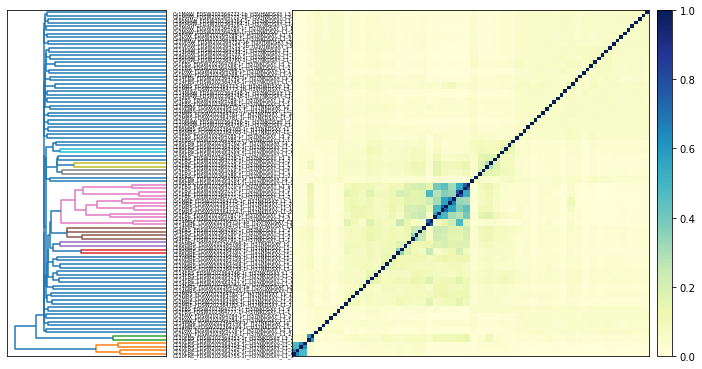

In [7]:
f, reordered_labels, reordered_matrix = fig.plot_composite_matrix(matrix, labels)

In [12]:
f.set_size_inches(11,11)
f.savefig('cmp.png', dpi=600, bbox_inches='tight')
f.savefig('cmp.svg', bbox_inches='tight', )

In [9]:
print('reordered matrix:\n', reordered_matrix)
reordered_matrix.tofile('reordered_matrix.tsv', sep="\t", format="%s")
print('reordered labels:', reordered_labels)
reordered_labels.tofile('reordered_labels.tsv', sep="\t", format="%s")

reordered matrix:
 [[1.         0.64723659 0.4852387  ... 0.00514909 0.0050784  0.00509301]
 [0.64723659 1.         0.4821513  ... 0.00535191 0.00522526 0.00527506]
 [0.4852387  0.4821513  1.         ... 0.00717747 0.0071991  0.00720446]
 ...
 [0.00514909 0.00535191 0.00717747 ... 1.         0.0626656  0.06351583]
 [0.0050784  0.00522526 0.0071991  ... 0.0626656  1.         0.0800302 ]
 [0.00509301 0.00527506 0.00720446 ... 0.06351583 0.0800302  1.        ]]
reordered labels: ['Cv1MAW_FDSW202364772-1b_H3VHWDSXY_L3_1', 'Cv1MAW_FDSW202364772-1b_H3VHWDSXY_L3_2', 'C195MAW_FDSW202364764-1r_H37NKDSXY_L1_2', 'C195MAW_FDSW202364764-1r_H37NKDSXY_L1_1', 'Cv2MAW_FDSW202364780-1r_H37NKDSXY_L1_1', 'Cv2MAW_FDSW202364780-1r_H37NKDSXY_L1_2', 'Cv4FAW_FDSW202364788-1r_H37NKDSXY_L1_1', 'Cv4FAW_FDSW202364788-1r_H37NKDSXY_L1_2', 'C120FAW_FDSW202364752-1b_H3VHWDSXY_L3_2', 'C120FAW_FDSW202364752-1b_H3VHWDSXY_L3_1', 'C114FAW_FDSW202364744-1r_H37NKDSXY_L1_2', 'C114FAW_FDSW202364744-1r_H37NKDSXY_L1_1', 'C195FAW

AttributeError: 'list' object has no attribute 'tofile'

## Customizing plots

If you want to customize the plots, please see the code for `plot_composite_matrix` in [sourmash/fig.py](https://github.com/dib-lab/sourmash/blob/latest/sourmash/fig.py), which is reproduced below; you can modify the code in place to (for example) [use custom dendrogram colors](https://stackoverflow.com/questions/38153829/custom-cluster-colors-of-scipy-dendrogram-in-python-link-color-func).

In [8]:
import scipy.cluster.hierarchy as sch

def plot_composite_matrix(D, labeltext, show_labels=True, show_indices=True,
                          vmax=1.0, vmin=0.0, force=False):
    """Build a composite plot showing dendrogram + distance matrix/heatmap.
    Returns a matplotlib figure."""
    if D.max() > 1.0 or D.min() < 0.0:
        error('This matrix doesn\'t look like a distance matrix - min value {}, max value {}', D.min(), D.max())
        if not force:
            raise ValueError("not a distance matrix")
        else:
            notify('force is set; scaling to [0, 1]')
            D -= D.min()
            D /= D.max()

    if show_labels:
        show_indices = True

    fig = pylab.figure(figsize=(11, 8))
    ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])

    # plot dendrogram
    Y = sch.linkage(D, method='single')  # centroid

    dendrolabels = labeltext
    if not show_labels:
        dendrolabels = [str(i) for i in range(len(labeltext))]

    Z1 = sch.dendrogram(Y, orientation='left', labels=dendrolabels,
                        no_labels=not show_indices)
    ax1.set_xticks([])

    xstart = 0.45
    width = 0.45
    if not show_labels:
        xstart = 0.315
    scale_xstart = xstart + width + 0.01

    # plot matrix
    axmatrix = fig.add_axes([xstart, 0.1, width, 0.6])

    # (this reorders D by the clustering in Z1)
    idx1 = Z1['leaves']
    D = D[idx1, :]
    D = D[:, idx1]

    # show matrix
    im = axmatrix.matshow(D, aspect='auto', origin='lower',
                          cmap=pylab.cm.YlGnBu, vmin=vmin, vmax=vmax)
    axmatrix.set_xticks([])
    axmatrix.set_yticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([scale_xstart, 0.1, 0.02, 0.6])
    pylab.colorbar(im, cax=axcolor)

    return fig

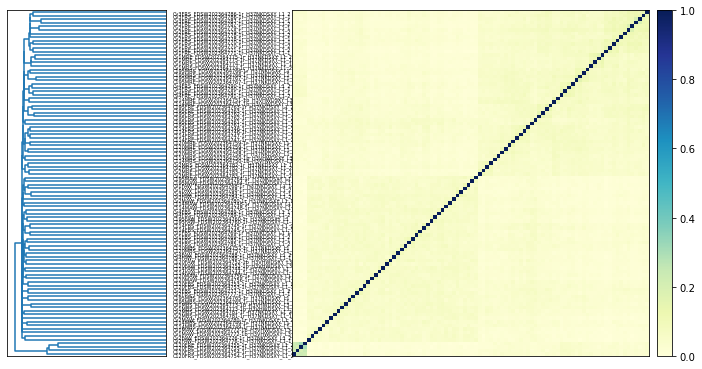

In [9]:
_ = plot_composite_matrix(matrix, labels)